In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries are installed successfully!")


Libraries are installed successfully!


In [ ]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For beautiful statistical plots

# Load the dataset 
file_path = r"C:\Users\Anastasiia\Documents\GitHub\churn_prediction\data\BankChurners.csv"  
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777

General information about the data

In [5]:
# Check the shape of the dataset (number of rows and columns)
print(f"\nThe dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# General information about the dataset
print("\nInformation about the dataset:")
print(df.info())

# Summary statistics for numerical columns
print("\nStatistical summary of numerical columns:")
print(df.describe())



The dataset has 10127 rows and 23 columns.

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gende

Deleting of unnecessary columns

In [7]:
# Dropping two unnecessary columns
columns_to_drop = [
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
]

# Check if columns exist in the dataset before dropping
for col in columns_to_drop:
    if col in df.columns:
        print(f"Dropping column: {col}")
    else:
        print(f"Column {col} not found in the dataset.")

# Drop the columns
df = df.drop(columns=columns_to_drop, errors='ignore')

# Confirm columns are removed
print("\nRemaining columns after dropping:")
print(df.columns)


Dropping column: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
Dropping column: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2

Remaining columns after dropping:
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


Checking for missing values


Missing values in each column:
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


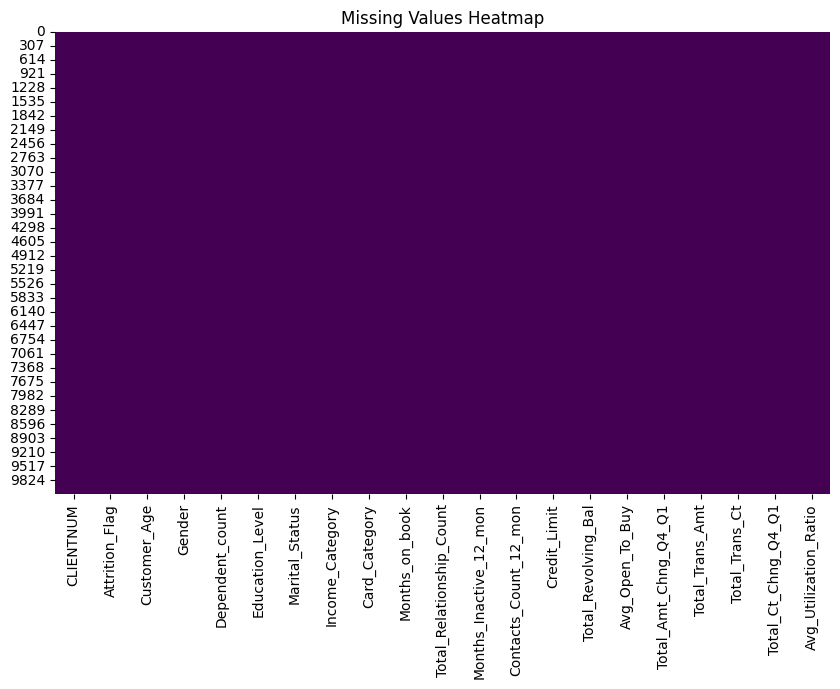

In [8]:
# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


Find anomalies (outliers)

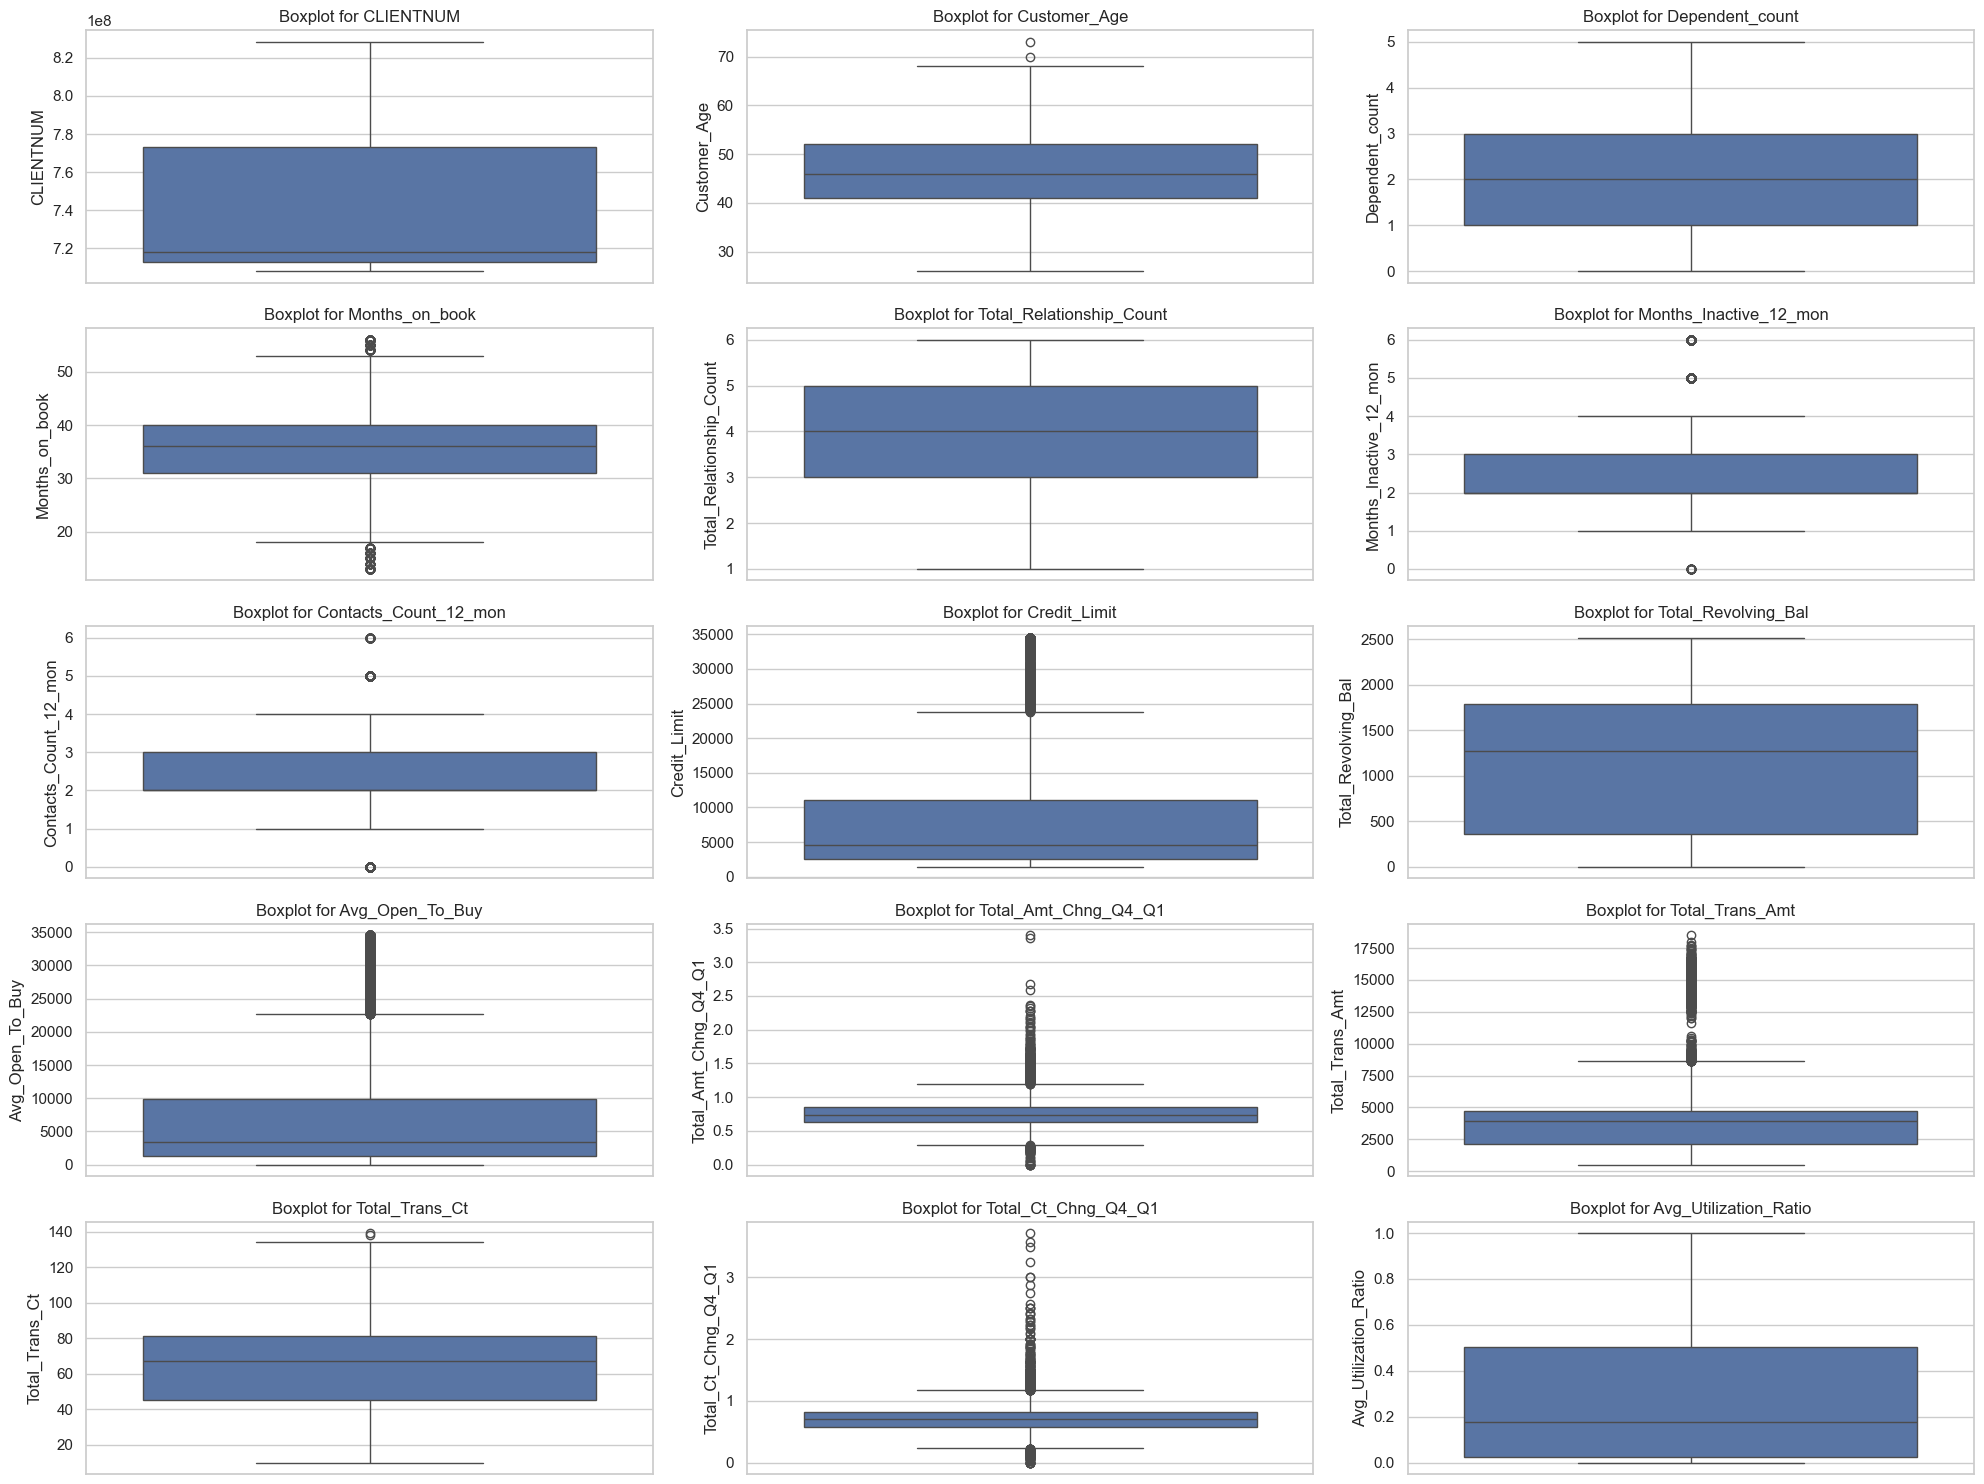

In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better visualization
sns.set(style="whitegrid")

# Select numerical columns from the dataframe
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Set the figure size for all boxplots
plt.figure(figsize=(20, 15))

# Loop through all numerical columns and create boxplots
for i, col in enumerate(numerical_columns):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i + 1)  # Create a grid with 3 plots per row
    sns.boxplot(y=df[col])  # Create a boxplot for the column
    plt.title(f"Boxplot for {col}")  # Add a title for each boxplot
    plt.xlabel('')  # Remove x-axis labels for cleaner visuals

# Automatically adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


Visualization of data characteristics

Review the distribution of numerical data and unique values ​​for categorical columns.

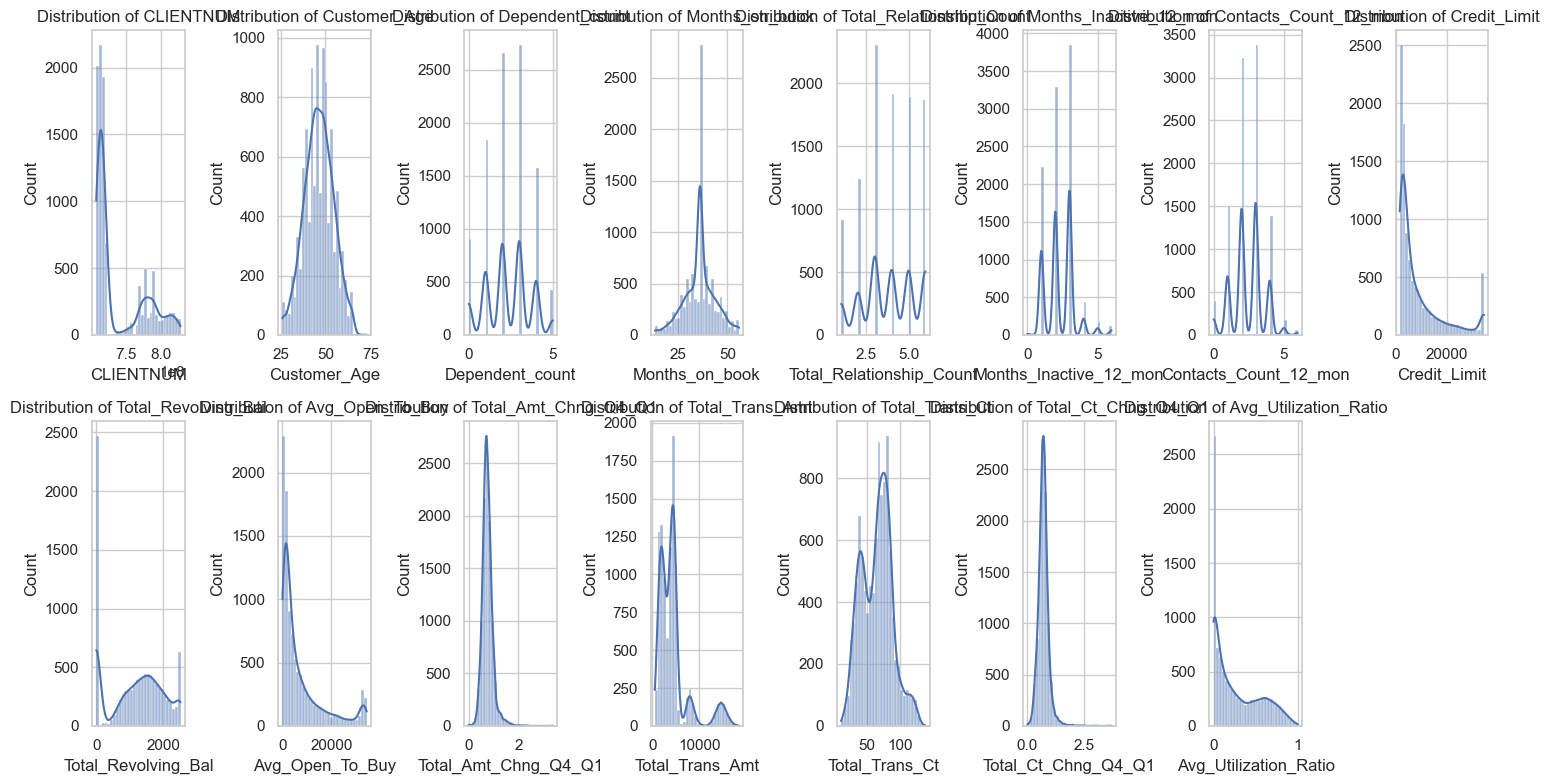


Unique values in categorical columns:
Attrition_Flag: ['Existing Customer' 'Attrited Customer']
Gender: ['M' 'F']
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']


In [11]:
# Plot histograms for numerical columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, len(numerical_columns)//2 + 1, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Check unique values for categorical columns
categorical_columns = df.select_dtypes(include=[object]).columns
print("\nUnique values in categorical columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")
